# Загрузка данных

In [83]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from datetime import datetime
import time
from sklearn.model_selection import train_test_split
import seaborn as sns
data = pd.read_csv("C:/Users/user/Downloads/2_5397998683834821212.csv")
data

,Год,Страна,Годовой темп роста ВВП %,Безработица %,Инфляция %,Официальная ставка процента %,"Государственный долг, млрд долларов",Доходы населения $,Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике,Расходы на здравоохранение % ВВП
0,2015.0,США,2.7,5.30,0.73,0.37,18100.0,56.516,"0.41,","8.3,"
1,2015.0,Китай,6.9,4.05,1.40,4.35,4200.0,29.381,"0.52,","10.2,"
2,2015.0,Япония,1.6,3.40,0.30,-0.10,10400.0,38.756,"0.48,","Np.Nan,"
3,2015.0,Германия,2.2,6.00,0.30,0.00,2100.0,47.592,"0.62,","9.8,"
4,2015.0,Великобритания,1.4,5.10,0.00,0.52,1780.0,42.513,"0.55,","9.9,"
5,2015.0,Франция,1.9,9.20,0.10,0.14,2100.0,41.237,"0.68,","8.7,"
6,2015.0,Индия,7.4,5.00,4.90,6.50,1300.0,1.581,"0.76,","8.6,"
7,2015.0,Россия,-2.0,5.80,12.91,13.50,525.0,10.743,"0.58,","Np.Nan,"
8,2016.0,США,1.7,4.70,2.07,0.14,19400.0,57.617,"0.59,","10.1,"
9,2016.0,Китай,6.7,4.02,2.00,4.35,4700.0,31.790,"0.47,","9.7,"


# Exploratory Data Analysis

## Inspect Structure
First thing to do with our data, is to take a peek onto its structure. Let's use info, describe, and head to see it. 

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   Год                                                                                   56 non-null     float64
 1   Страна                                                                                56 non-null     object 
 2   Годовой темп роста ВВП %                                                              56 non-null     float64
 3   Безработица %                                                                         56 non-null     float64
 4   Инфляция %                                                                            56 non-null     float64
 5   Официальная ставка процента %                                                         5

In [85]:
data.count() # Количество значений в каждом атрибуте

Год                                                                                     56
Страна                                                                                  56
Годовой темп роста ВВП %                                                                56
Безработица %                                                                           56
Инфляция %                                                                              56
Официальная ставка процента %                                                           56
Государственный долг, млрд долларов                                                     56
Доходы населения $                                                                      56
Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике    56
Расходы на здравоохранение % ВВП                                                        56
dtype: int64

In [86]:
data.nunique()  # Количество уникальных значений в каждом атрибуте

Год                                                                                      7
Страна                                                                                   8
Годовой темп роста ВВП %                                                                38
Безработица %                                                                           38
Инфляция %                                                                              38
Официальная ставка процента %                                                           30
Государственный долг, млрд долларов                                                     49
Доходы населения $                                                                      43
Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике    31
Расходы на здравоохранение % ВВП                                                        30
dtype: int64

In [81]:
print(data[data['Страна'] == 'Россия'].describe()) # Описательная статистика

               Год  Годовой темп роста ВВП %  Безработица %  Инфляция %  \
count     7.000000                  7.000000       7.000000    7.000000   
mean   2018.000000                  0.771429       5.185714    5.918571   
std       2.160247                  2.669403       0.514550    3.623812   
min    2015.000000                 -3.100000       4.700000    2.520000   
25%    2016.500000                 -0.900000       4.850000    3.660000   
50%    2018.000000                  1.300000       4.900000    4.910000   
75%    2019.500000                  2.150000       5.500000    6.885000   
max    2021.000000                  4.700000       6.000000   12.910000   

       Официальная ставка процента %  Государственный долг, млрд долларов  \
count                       7.000000                             7.000000   
mean                        8.335714                           401.571429   
std                         2.925565                           139.021410   
min             

In [7]:
# Провека на пустые значения
for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].isnull().sum(), data[col_name].dtype)
    print("-----------------")

Column Name: Год
3 float64
-----------------
Column Name: Страна
3 object
-----------------
Column Name: Годовой темп роста ВВП %
3 float64
-----------------
Column Name: Безработица %
3 float64
-----------------
Column Name: Инфляция %
3 float64
-----------------
Column Name: Официальная ставка процента %
3 float64
-----------------
Column Name: Государственный долг, млрд долларов
3 float64
-----------------
Column Name: Доходы населения $
3 float64
-----------------
Column Name: Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике
3 object
-----------------
Column Name: Расходы на здравоохранение % ВВП
3 object
-----------------


<AxesSubplot:>

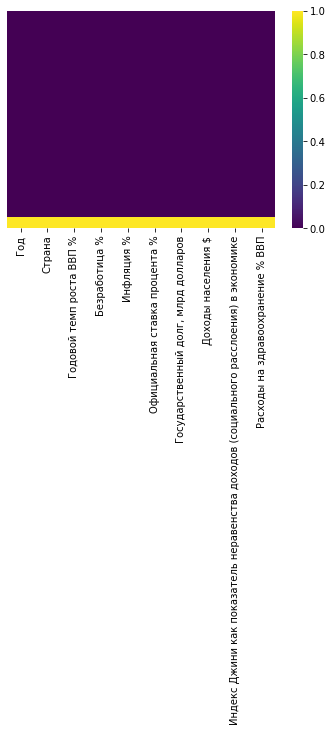

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis') # Визуализируем пустые значения

In [9]:
data = data.dropna(subset=['Год', 'Страна'])

In [10]:
# Повторная провека на пустые значения
for col_name in data.columns:
    print(f"Column Name: {col_name}")
    print(data[col_name].isnull().sum(), data[col_name].dtype)
    print("-----------------")

Column Name: Год
0 float64
-----------------
Column Name: Страна
0 object
-----------------
Column Name: Годовой темп роста ВВП %
0 float64
-----------------
Column Name: Безработица %
0 float64
-----------------
Column Name: Инфляция %
0 float64
-----------------
Column Name: Официальная ставка процента %
0 float64
-----------------
Column Name: Государственный долг, млрд долларов
0 float64
-----------------
Column Name: Доходы населения $
0 float64
-----------------
Column Name: Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике
0 object
-----------------
Column Name: Расходы на здравоохранение % ВВП
0 object
-----------------


In [12]:
data.head()

,Год,Страна,Годовой темп роста ВВП %,Безработица %,Инфляция %,Официальная ставка процента %,"Государственный долг, млрд долларов",Доходы населения $,Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике,Расходы на здравоохранение % ВВП
0,2015.0,США,2.7,5.30,0.73,0.37,18100.0,56.516,"0.41,","8.3,"
1,2015.0,Китай,6.9,4.05,1.40,4.35,4200.0,29.381,"0.52,","10.2,"
2,2015.0,Япония,1.6,3.40,0.30,-0.10,10400.0,38.756,"0.48,","Np.Nan,"
3,2015.0,Германия,2.2,6.00,0.30,0.00,2100.0,47.592,"0.62,","9.8,"
4,2015.0,Великобритания,1.4,5.10,0.00,0.52,1780.0,42.513,"0.55,","9.9,"


In [13]:
#Повторная проверка датасета на отсутсвующие значения.

In [14]:
data.isna().sum()

Год                                                                                     0
Страна                                                                                  0
Годовой темп роста ВВП %                                                                0
Безработица %                                                                           0
Инфляция %                                                                              0
Официальная ставка процента %                                                           0
Государственный долг, млрд долларов                                                     0
Доходы населения $                                                                      0
Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике    0
Расходы на здравоохранение % ВВП                                                        0
dtype: int64

<AxesSubplot:>

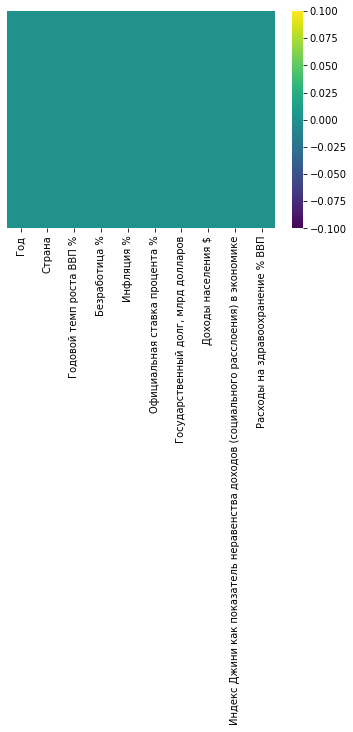

In [15]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=True,cmap='viridis') # Визуализируем пустые значения

In [87]:
print(data.dtypes)

Год                                                                                     float64
Страна                                                                                   object
Годовой темп роста ВВП %                                                                float64
Безработица %                                                                           float64
Инфляция %                                                                              float64
Официальная ставка процента %                                                           float64
Государственный долг, млрд долларов                                                     float64
Доходы населения $                                                                      float64
Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике     object
Расходы на здравоохранение % ВВП                                                         object
dtype: object


In [16]:
#Так же удалим ячейки которые нам не подребуются для моделирования Макроэкономических показателей

In [17]:
data = data.drop("Индекс Джини как показатель неравенства доходов (социального расслоения) в экономике" , axis=1)

In [18]:
data = data.drop("Расходы на здравоохранение % ВВП" , axis=1)

In [ ]:
# Проверка данных напримере  определенной страны
data.loc[data['Страна'] == 'Китай']

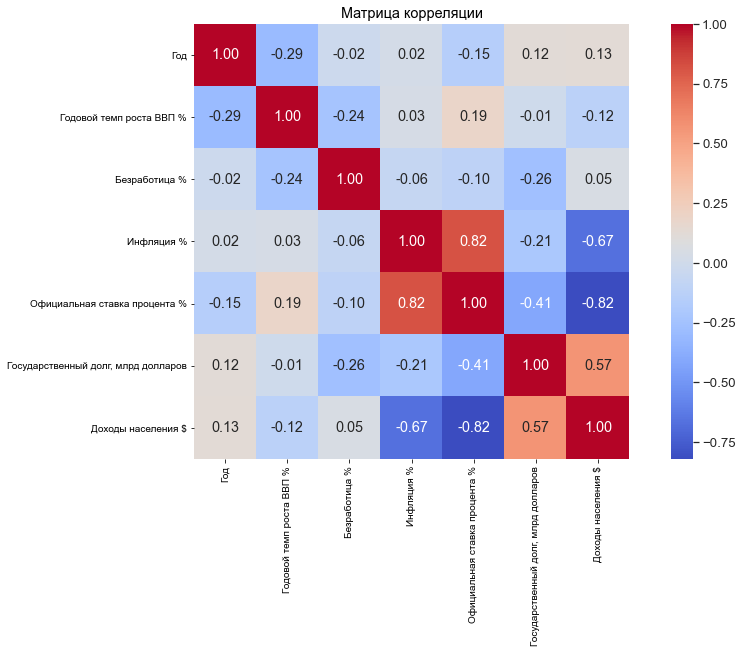

In [19]:
# построение матрицы корреляции
corr_matrix = data.corr()

# настройки графика
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.2)

# построение тепловой карты
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, ax=ax)

# настройки осей и заголовка
ax.set_title('Матрица корреляции')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# отображение графика
plt.show()

In [20]:
data

,Год,Страна,Годовой темп роста ВВП %,Безработица %,Инфляция %,Официальная ставка процента %,"Государственный долг, млрд долларов",Доходы населения $
0,2015.0,США,2.7,5.30,0.73,0.37,18100.0,56.516
1,2015.0,Китай,6.9,4.05,1.40,4.35,4200.0,29.381
2,2015.0,Япония,1.6,3.40,0.30,-0.10,10400.0,38.756
3,2015.0,Германия,2.2,6.00,0.30,0.00,2100.0,47.592
4,2015.0,Великобритания,1.4,5.10,0.00,0.52,1780.0,42.513
5,2015.0,Франция,1.9,9.20,0.10,0.14,2100.0,41.237
6,2015.0,Индия,7.4,5.00,4.90,6.50,1300.0,1.581
7,2015.0,Россия,-2.0,5.80,12.91,13.50,525.0,10.743
8,2016.0,США,1.7,4.70,2.07,0.14,19400.0,57.617
9,2016.0,Китай,6.7,4.02,2.00,4.35,4700.0,31.790


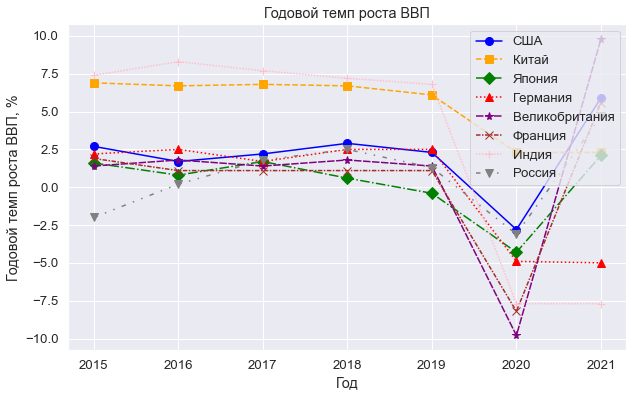

In [21]:
import matplotlib.pyplot as plt

# Данные для построения графика
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
countries = ['США', 'Китай', 'Япония', 'Германия', 'Великобритания', 'Франция', 'Индия', 'Россия']
gdp_growth_rates = [    [2.7, 1.7, 2.2, 2.9, 2.3, -2.8, 5.9],
    [6.9, 6.7, 6.8, 6.7, 6.1, 2.3, 2.3],
    [1.6, 0.8, 1.7, 0.6, -0.4, -4.3, 2.1],
    [2.2, 2.5, 1.7, 2.5, 2.5, -4.9, -5],
    [1.4, 1.8, 1.4, 1.8, 1.4, -9.8, 9.8],
    [1.9, 1.1, 1.1, 1.1, 1.1, -8.2, 5.6],
    [7.4, 8.3, 7.7, 7.2, 6.8, -7.7, -7.7],
    [-2, 0.2, 1.8, 2.5, 1.3, -3.1, 4.7],
]

# Размер графика
plt.figure(figsize=(10, 6))

# Построение графика для каждой страны
linestyles = ['-', '--', '-.', ':', (0, (5, 1)), (0, (3, 1, 1, 1)), (0, (1, 1)), (0, (3, 5, 1, 5, 1, 5))]
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
markers = ['o', 's', 'D', '^', '*', 'x', '+', 'v']
for i in range(len(countries)):
    plt.plot(years, gdp_growth_rates[i], linestyle=linestyles[i], color=colors[i], marker=markers[i], markersize=8, label=countries[i])

# Настройки графика
plt.title('Годовой темп роста ВВП')
plt.xlabel('Год')
plt.ylabel('Годовой темп роста ВВП, %')
plt.legend(loc='upper right')

#Отображение графика
plt.show()


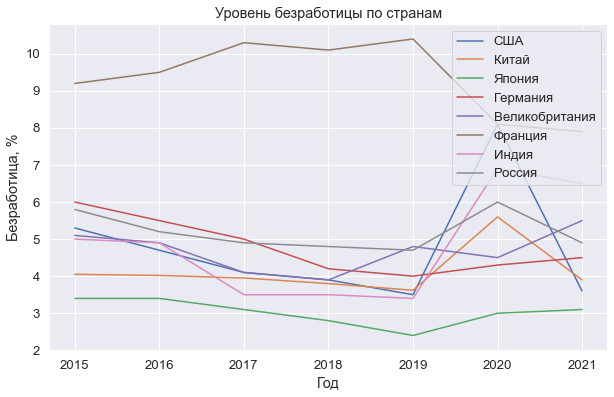

In [90]:
import matplotlib.pyplot as plt

# Создаем словарь со списками значений для каждой страны
data_dict = {
    'США': [5.3, 4.7, 4.1, 3.9, 3.5, 8.1, 3.6],
    'Китай': [4.05, 4.02, 3.95, 3.8, 3.62, 5.6, 3.9],
    'Япония': [3.4, 3.4, 3.1, 2.8, 2.4, 3, 3.1],
    'Германия': [6, 5.5, 5, 4.2, 4, 4.3, 4.5],
    'Великобритания': [5.1, 4.9, 4.1, 3.9, 4.8, 4.5, 5.5],
    'Франция': [9.2, 9.5, 10.3, 10.1, 10.4, 8.1, 7.9],
    'Индия': [5, 4.9, 3.5, 3.5, 3.4, 6.9, 6.5],
    'Россия': [5.8, 5.2, 4.9, 4.8, 4.7, 6, 4.9]
}

# Создаем список с годами
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Строим график
plt.figure(figsize=(10, 6))

for country, values in data_dict.items():
    plt.plot(years, values, label=country)

plt.legend(loc='upper right')
plt.title('Уровень безработицы по странам')
plt.xlabel('Год')
plt.ylabel('Безработица, %')
plt.show()

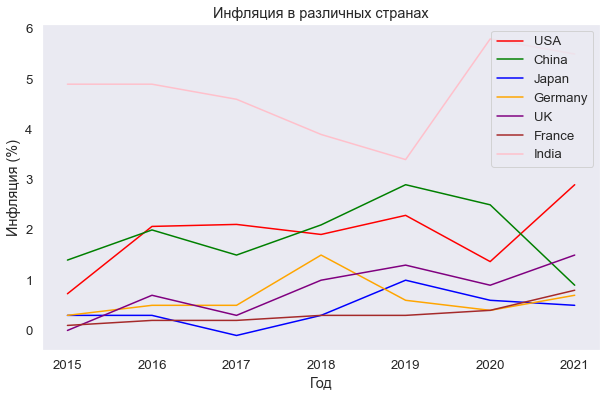

In [96]:
import matplotlib.pyplot as plt

# Данные по инфляции для каждой страны
data = {
    'USA': [0.73, 2.07, 2.11, 1.91, 2.29, 1.37, 2.9],
    'China': [1.4, 2, 1.5, 2.1, 2.9, 2.5, 0.9],
    'Japan': [0.3, 0.3, -0.1, 0.3, 1, 0.6, 0.5],
    'Germany': [0.3, 0.5, 0.5, 1.5, 0.6, 0.4, 0.7],
    'UK': [0, 0.7, 0.3, 1, 1.3, 0.9, 1.5],
    'France': [0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.8],
    'India': [4.9, 4.9, 4.6, 3.9, 3.4, 5.8, 5.5],
    'Russia': [12.91, 5.38, 2.52, 4.27, 3.05, 4.91, 8.39],
}

# Года, для которых представлены данные
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Цвета для каждой страны на графике
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
plt.figure(figsize=(10, 6))
# Построение графика
for country, inflation, color in zip(data.keys(), data.values(), colors):
    plt.plot(years, inflation, label=country, color=color)

# Настройка отображения графика
plt.title('Инфляция в различных странах')
plt.xlabel('Год')
plt.ylabel('Инфляция (%)')
plt.legend(loc='upper right')
plt.grid()

# Отображение графика
plt.show()


In [68]:

# Выбор данных только для одной страны
country = 'Россия'
df_country = data[data['Страна'] == country]

# Определение признаков и целевой переменной
X = df_country[['Год', 'Годовой темп роста ВВП %',  'Инфляция %', 'Официальная ставка процента %', 'Доходы населения $','Государственный долг, млрд долларов', ]]
y = df_country['Безработица %']

# Разделение данных на тренировочный и тестовый датасеты
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
import numpy as np

# Обучение и оценка модели линейной регрессии
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

# Обучение и оценка модели нейронной сети
mlp_model = MLPRegressor(hidden_layer_sizes=(5, 30), max_iter=500, random_state=1)
mlp_model.fit(X_train, y_train)
y_mlp_pred = mlp_model.predict(X_test)

# Вычисление метрик
mae_linear = mean_absolute_error(y_test, y_linear_pred)
mse_linear = mean_squared_error(y_test, y_linear_pred)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_linear_pred)
corr2_linear = np.corrcoef(y_test, y_linear_pred)[0,1]**2

mae_mlp = mean_absolute_error(y_test, y_mlp_pred)
mse_mlp = mean_squared_error(y_test, y_mlp_pred)
rmse_mlp = np.sqrt(mse_mlp)
r2_mlp = r2_score(y_test, y_mlp_pred)
corr2_mlp = np.corrcoef(y_test, y_mlp_pred)[0,1]**2

# Вывод метрик
print("Метрики линейной регрессии:")
print("  Средняя абсолютная ошибка (MAE): {:.2f}".format(mae_linear))
print("  Среднеквадратичная ошибка (MSE): {:.2f}".format(mse_linear))
print("  Корень из среднеквадратичной ошибки (RMSE): {:.2f}".format(rmse_linear))

print("Метрики нейронной сети:")
print("  Средняя абсолютная ошибка (MAE): {:.2f}".format(mae_mlp))
print("  Среднеквадратичная ошибка (MSE): {:.2f}".format(mse_mlp))
print("  Корень из среднеквадратичной ошибки (RMSE): {:.2f}".format(rmse_mlp))

Метрики линейной регрессии:
  Средняя абсолютная ошибка (MAE): 0.17
  Среднеквадратичная ошибка (MSE): 0.05
  Корень из среднеквадратичной ошибки (RMSE): 0.23
Метрики нейронной сети:
  Средняя абсолютная ошибка (MAE): 0.26
  Среднеквадратичная ошибка (MSE): 0.11
  Корень из среднеквадратичной ошибки (RMSE): 0.33


C:\Users\user\anaconda33\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\user\anaconda33\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\user\anaconda33\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\user\anaconda33\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


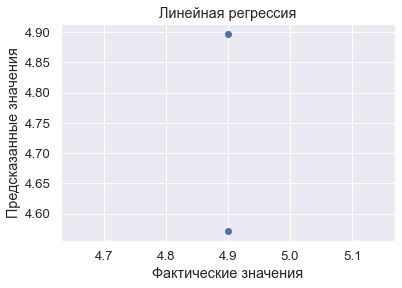

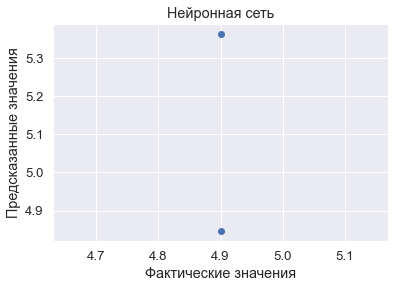

In [77]:
import matplotlib.pyplot as plt

# Построение графика для линейной регрессии
plt.scatter(y_test, y_linear_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Линейная регрессия")
plt.show()

# Построение графика для нейронной сети
plt.scatter(y_test, y_mlp_pred)
plt.xlabel("Фактические значения")
plt.ylabel("Предсказанные значения")
plt.title("Нейронная сеть")
plt.show()

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

# Инициализация модели
model = GradientBoostingRegressor()

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Получение предсказаний на тестовых данных
y_pred = model.predict(X_test)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Предсказание значений тестового набора данных
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print("GradientBoostingRegressor:")
print("Средняя абсолютная ошибка (MAE): {:.2f}".format(mae))
print("Среднеквадратичная ошибка (MSE): {:.2f}".format(mse))
print("Корень из среднеквадратичной ошибки (RMSE): {:.2f}".format(rmse_linear))

GradientBoostingRegressor:
Средняя абсолютная ошибка (MAE): 0.03
Среднеквадратичная ошибка (MSE): 0.00
Корень из среднеквадратичной ошибки (RMSE): 0.23


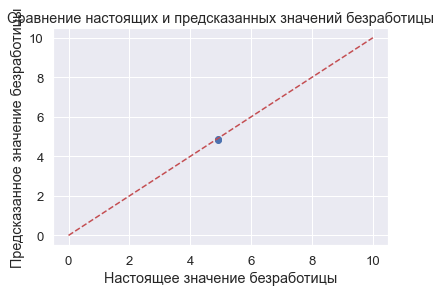

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([0, 10], [0, 10], 'r--')
plt.xlabel('Настоящее значение безработицы')
plt.ylabel('Предсказанное значение безработицы')
plt.title('Сравнение настоящих и предсказанных значений безработицы')
plt.show()
